# Datasets with PyTorch


## Perform standard imports

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.shape

(150, 5)

In [7]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

## Plot the data

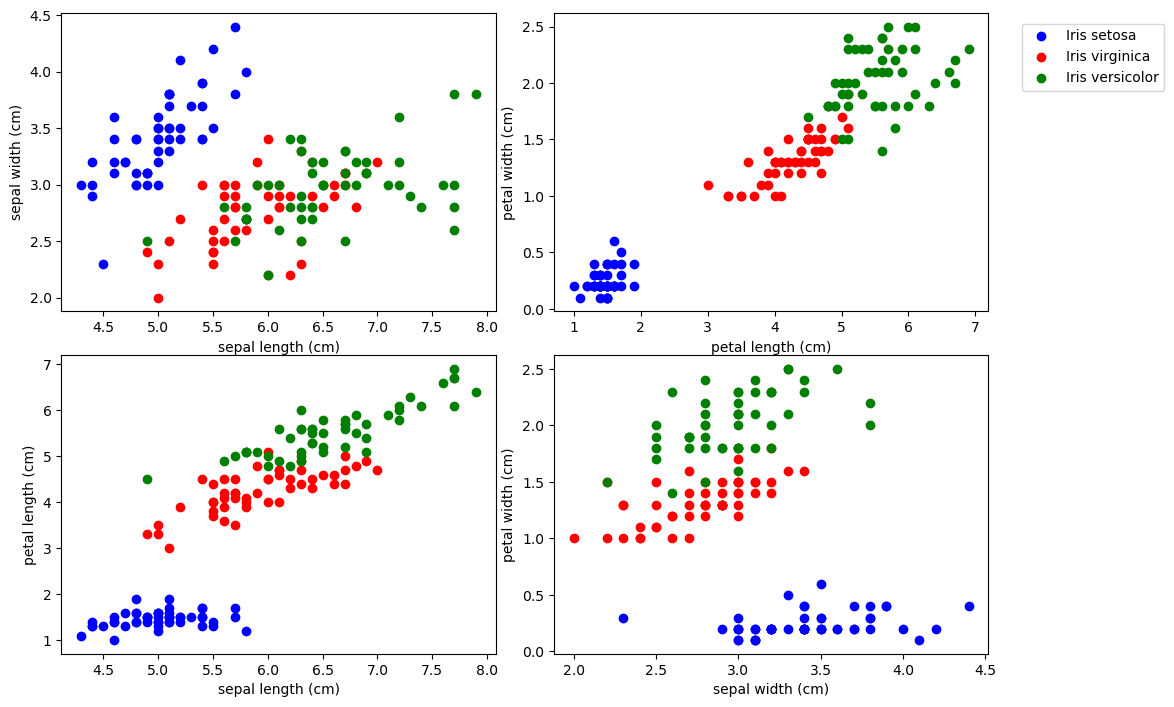

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [5]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)

In [6]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


In [8]:
X_train.size()

torch.Size([120, 4])

In [9]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>NOTE: </strong>It's up to us to remember which columns correspond to which features.</div>

## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [10]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values



In [11]:
data.shape

(150, 4)

In [12]:
labels.shape

(150,)

In [13]:
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [14]:
len(iris)

150

In [15]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [21]:
for x,y in iris:
    print('x= ', x, 'y=',y)
  

x=  tensor([5.1000, 3.5000, 1.4000, 0.2000]) y= tensor(0)
x=  tensor([4.9000, 3.0000, 1.4000, 0.2000]) y= tensor(0)
x=  tensor([4.7000, 3.2000, 1.3000, 0.2000]) y= tensor(0)
x=  tensor([4.6000, 3.1000, 1.5000, 0.2000]) y= tensor(0)
x=  tensor([5.0000, 3.6000, 1.4000, 0.2000]) y= tensor(0)
x=  tensor([5.4000, 3.9000, 1.7000, 0.4000]) y= tensor(0)
x=  tensor([4.6000, 3.4000, 1.4000, 0.3000]) y= tensor(0)
x=  tensor([5.0000, 3.4000, 1.5000, 0.2000]) y= tensor(0)
x=  tensor([4.4000, 2.9000, 1.4000, 0.2000]) y= tensor(0)
x=  tensor([4.9000, 3.1000, 1.5000, 0.1000]) y= tensor(0)
x=  tensor([5.4000, 3.7000, 1.5000, 0.2000]) y= tensor(0)
x=  tensor([4.8000, 3.4000, 1.6000, 0.2000]) y= tensor(0)
x=  tensor([4.8000, 3.0000, 1.4000, 0.1000]) y= tensor(0)
x=  tensor([4.3000, 3.0000, 1.1000, 0.1000]) y= tensor(0)
x=  tensor([5.8000, 4.0000, 1.2000, 0.2000]) y= tensor(0)
x=  tensor([5.7000, 4.4000, 1.5000, 0.4000]) y= tensor(0)
x=  tensor([5.4000, 3.9000, 1.3000, 0.4000]) y= tensor(0)
x=  tensor([5.

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [29]:
iris_loader = DataLoader(iris, batch_size=20, shuffle=True)

In [30]:
for X, Y in iris_loader:
    print(X.shape, Y.shape)

torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([20, 4]) torch.Size([20])
torch.Size([10, 4]) torch.Size([10])
